In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
data = pd.read_csv(r'C:\Users\acer\Documents\Ecommerce_Customer_Data.csv')
data.head() 

C:\Users\acer\AppData\Local\Temp\ipykernel_6828\1417043206.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'C:\Users\acer\Documents\Ecommerce_Customer_Data.csv')


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Unnamed: 13,Unnamed: 14
0,46251,08-09-2020,Electronics,12,3,740,Credit Card,37,0,Christine Hernandez,37,Male,No,NaN,NaN
1,46251,05-03-2022,Home,468,4,2739,PayPal,37,0,Christine Hernandez,37,Male,No,NaN,NaN
2,46251,23-05-2022,Home,288,2,3196,PayPal,37,0,Christine Hernandez,37,Male,No,NaN,NaN
3,46251,12-11-2020,Clothing,196,1,3509,PayPal,37,0,Christine Hernandez,37,Male,No,NaN,NaN
4,13593,27-11-2020,Home,449,1,3452,Credit Card,49,0,James Grant,49,Female,Yes,NaN,NaN


## Checking Null Values

In [4]:
data.isnull().sum()

Customer ID                   0
Purchase Date                 0
Product Category              0
Product Price                 0
Quantity                      0
Total Purchase Amount         0
Payment Method                0
Customer Age                  0
Returns                       0
Customer Name                 0
Age                           0
Gender                        0
Churn                         0
Unnamed: 13              250000
Unnamed: 14              249999
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                250000 non-null  int64  
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  object 
 13  Unnamed: 13            0 non-null       float64
 14  Unnamed: 14            1 non-null   

In [6]:
data.columns

Index(['Customer ID', 'Purchase Date', 'Product Category', 'Product Price',
       'Quantity', 'Total Purchase Amount', 'Payment Method', 'Customer Age',
       'Returns', 'Customer Name', 'Age', 'Gender', 'Churn', 'Unnamed: 13',
       'Unnamed: 14'],
      dtype='object')

## Droping Unwanted Columns

In [7]:
data.drop(['Unnamed: 13','Unnamed: 14','Customer ID','Customer Name'], axis=1, inplace=True)
data

,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Age,Gender,Churn
0,08-09-2020,Electronics,12,3,740,Credit Card,37,0,37,Male,No
1,05-03-2022,Home,468,4,2739,PayPal,37,0,37,Male,No
2,23-05-2022,Home,288,2,3196,PayPal,37,0,37,Male,No
3,12-11-2020,Clothing,196,1,3509,PayPal,37,0,37,Male,No
4,27-11-2020,Home,449,1,3452,Credit Card,49,0,49,Female,Yes
...,...,...,...,...,...,...,...,...,...,...,...
249995,10-08-2023,Clothing,279,2,2187,PayPal,55,1,55,Male,Yes
249996,23-11-2021,Home,27,1,3615,Credit Card,42,1,42,Female,Yes
249997,02-07-2020,Home,17,5,2466,Cash,41,0,41,Male,No
249998,30-12-2020,Books,398,2,3668,Crypto,34,0,34,Female,Yes


## Payment Method Distribution

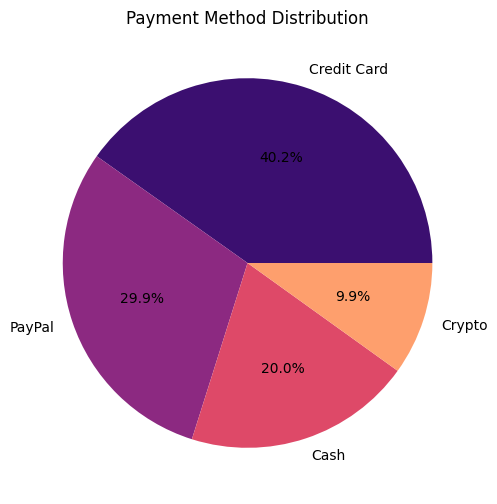

In [8]:
# Get the count of each payment method
payment_counts = data['Payment Method'].value_counts()

# Plot
plt.figure(figsize=(20, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('magma', len(payment_counts)))
plt.title('Payment Method Distribution')
plt.show()

The plot shows the distribution of payment methods used.Credit cards are the most popular method, accounting for 40.2% of transactions. PayPal is the second most popular, with 29.9% of transactions. Cash and cryptocurrencies are less popular, with 20.0% and 9.9% of transactions respectively.

## Distribution of Payment Method by Gender

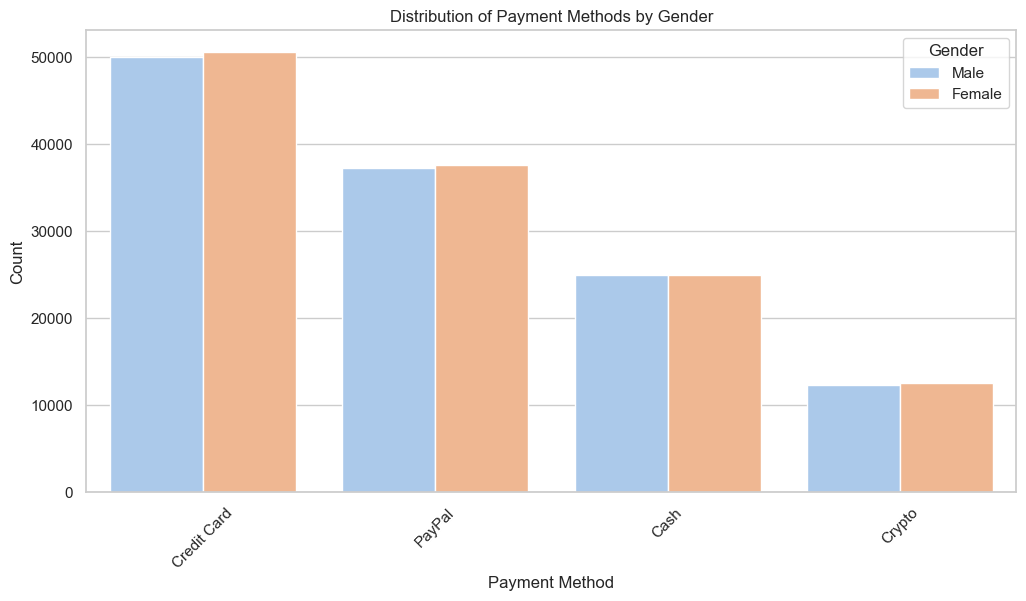

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 6))

# Count Plot for Payment Method by Gender
sns.countplot(x='Payment Method', hue='Gender', data=data, palette='pastel')
plt.title('Distribution of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')

# Show the plot
plt.show()


The plot shows that both male and female customers prefer credit cards and PayPal, with slightly more females using PayPal. Cash and cryptocurrencies are less popular, with males using them slightly more often.

## Product Category Distribution

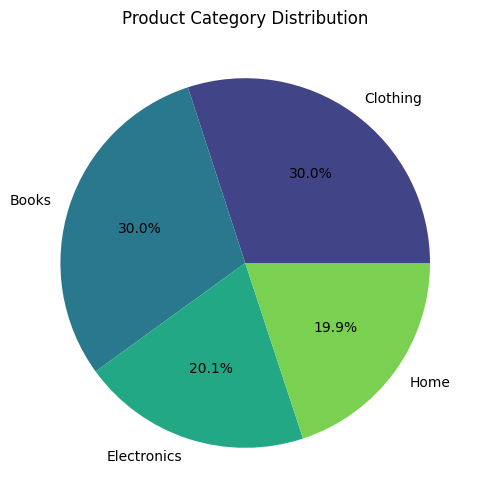

In [9]:

# Get the count of each category
category_counts = data['Product Category'].value_counts()

# Plot
plt.figure(figsize=(20, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Product Category Distribution')
plt.show()

The plot shows the distribution of product categories. Clothing, books, electronics, and home goods each make up 30%, 30%, 20.1%, and 19.9% of the total product categories, respectively.

## Total Sales by Age Group

C:\Users\acer\AppData\Local\Temp\ipykernel_12784\363958805.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Purchase Amount'].sum().reset_index()
C:\Users\acer\AppData\Local\Temp\ipykernel_12784\363958805.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Age Group', y='Total Purchase Amount', data=age_group_sales, palette='Greens_d')
C:\Users\acer\AppData\Local\Temp\ipykernel_12784\363958805.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rot

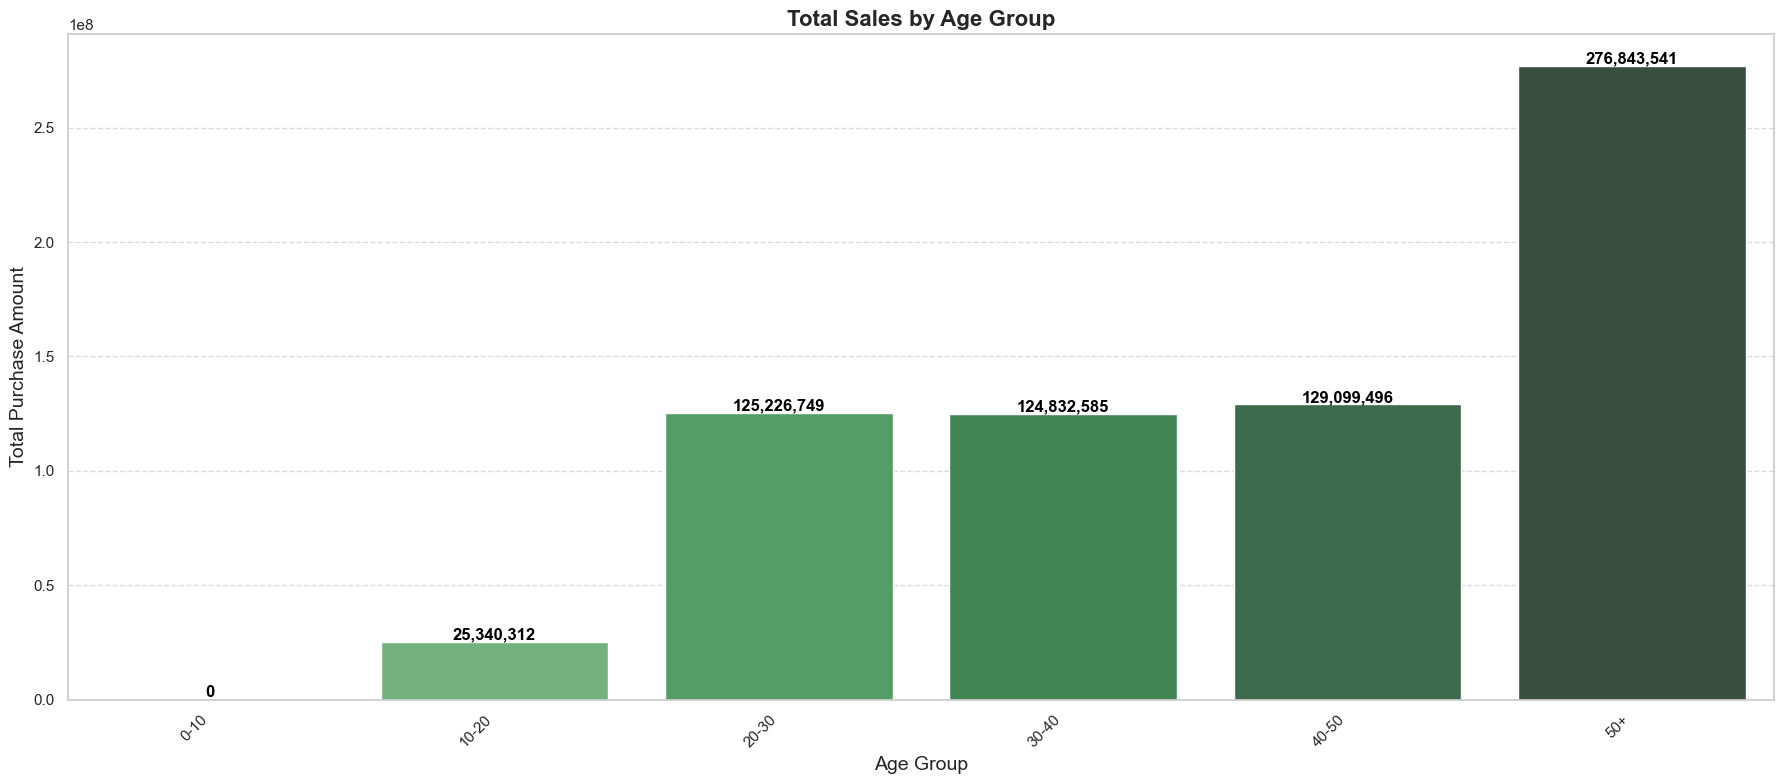

In [12]:

df = pd.DataFrame(data)

# Define age groups
bins = [0, 10, 20, 30, 40, 50, 100]  # Define age ranges
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50+']
df['Age Group'] = pd.cut(df['Customer Age'], bins=bins, labels=labels, right=False)

# Aggregate total purchase amount by age group
age_group_sales = df.groupby('Age Group')['Total Purchase Amount'].sum().reset_index()

# Set the Seaborn style
sns.set(style='whitegrid')

# Create Seaborn bar plot
plt.figure(figsize=(18, 8))  # Set figure size
bar_plot = sns.barplot(x='Age Group', y='Total Purchase Amount', data=age_group_sales, palette='Greens_d')

# Customize the plot
bar_plot.set_title('Total Sales by Age Group', fontsize=16, weight='bold')
bar_plot.set_xlabel('Age Group', fontsize=14)
bar_plot.set_ylabel('Total Purchase Amount', fontsize=14)
bar_plot.set_xticklabels(bar_plot.get_xticklabels(), rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points',
                      fontsize=12, weight='bold', color='black')

plt.tight_layout()
plt.show()

The plot shows the Age Group 0-10: This age group has the lowest total sales.
Age Group 10-20: Sales increase significantly compared to the previous age group.
Age Groups 20-30, 30-40, and 40-50: These age groups show a steady increase in total sales.
Age Group 50+: This age group has the highest total sales, indicating that older customers tend to spend more.

## Churn Distribution and Churn Rate by Gender

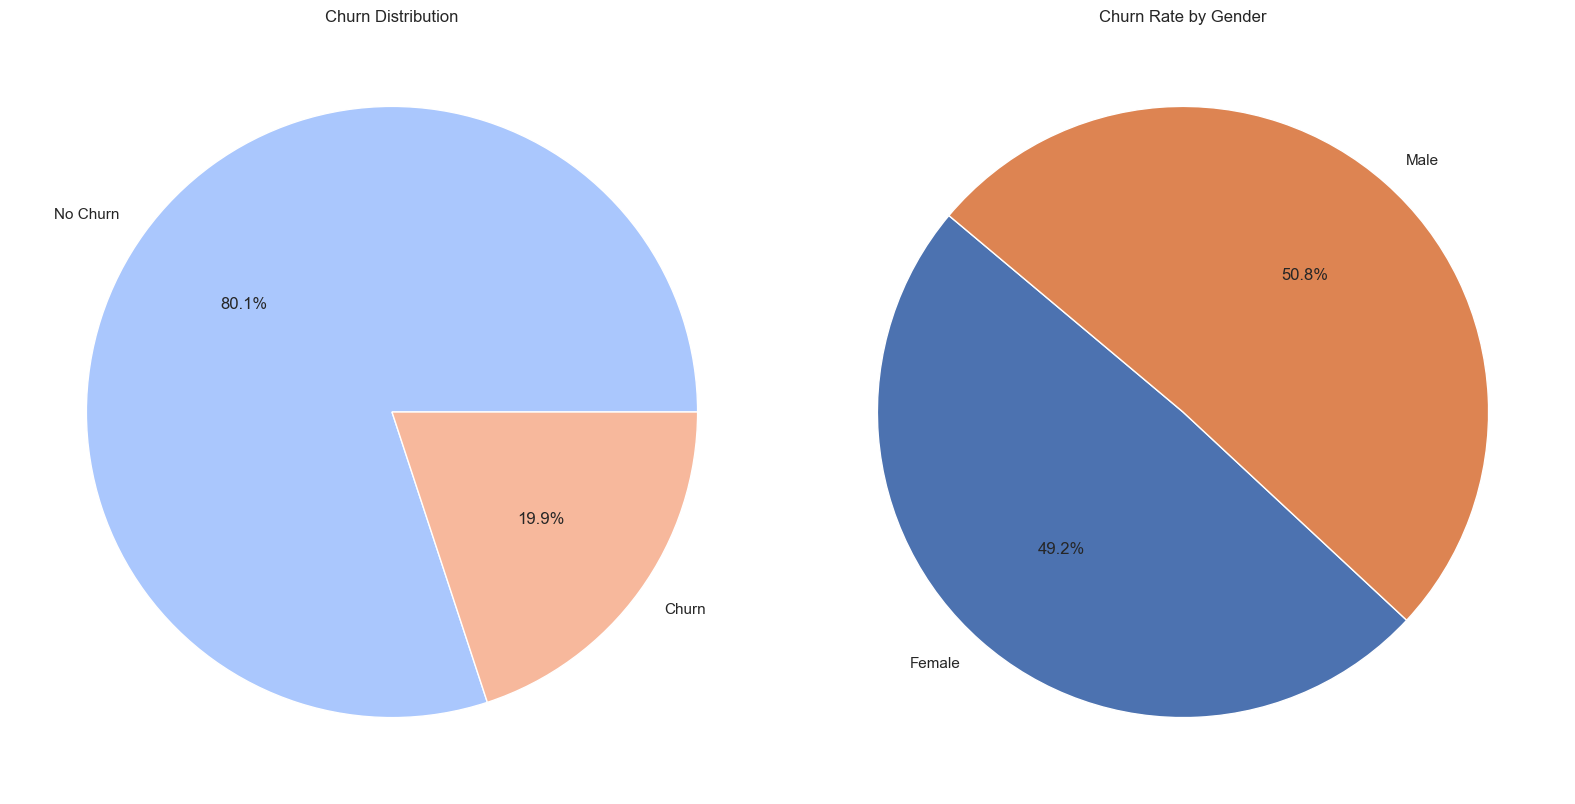

In [35]:


# Create a DataFrame
df = pd.DataFrame(data)

# Convert Churn to a binary variable for plotting
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Get the count of churn vs. no churn
churn_counts = df['Churn'].value_counts()

# Create a pivot table to calculate churn rate by gender
churn_rate = df.groupby('Gender')['Churn'].mean().reset_index()
churn_rate.columns = ['Gender', 'Churn Rate']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first pie chart for churn distribution
axes[0].pie(churn_counts, labels=['No Churn', 'Churn'], autopct='%1.1f%%', colors=sns.color_palette('coolwarm', len(churn_counts)))
axes[0].set_title('Churn Distribution')

# Plot the second pie chart for churn rate by gender
axes[1].pie(churn_rate['Churn Rate'], labels=churn_rate['Gender'], autopct='%1.1f%%', startangle=140)
axes[1].set_title('Churn Rate by Gender')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

The first pie chart, titled "Churn Distribution," shows the overall churn rate. The majority of customers (80.1%) did not churn, while 19.9% did.

The second pie chart, titled "Churn Rate by Gender," breaks down the churn rate by gender. Male customers have a slightly higher churn rate of 50.8%, compared to 49.2% for female customers.

## Count of Churn by Gender

C:\Users\acer\AppData\Local\Temp\ipykernel_5340\744447512.py:28: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




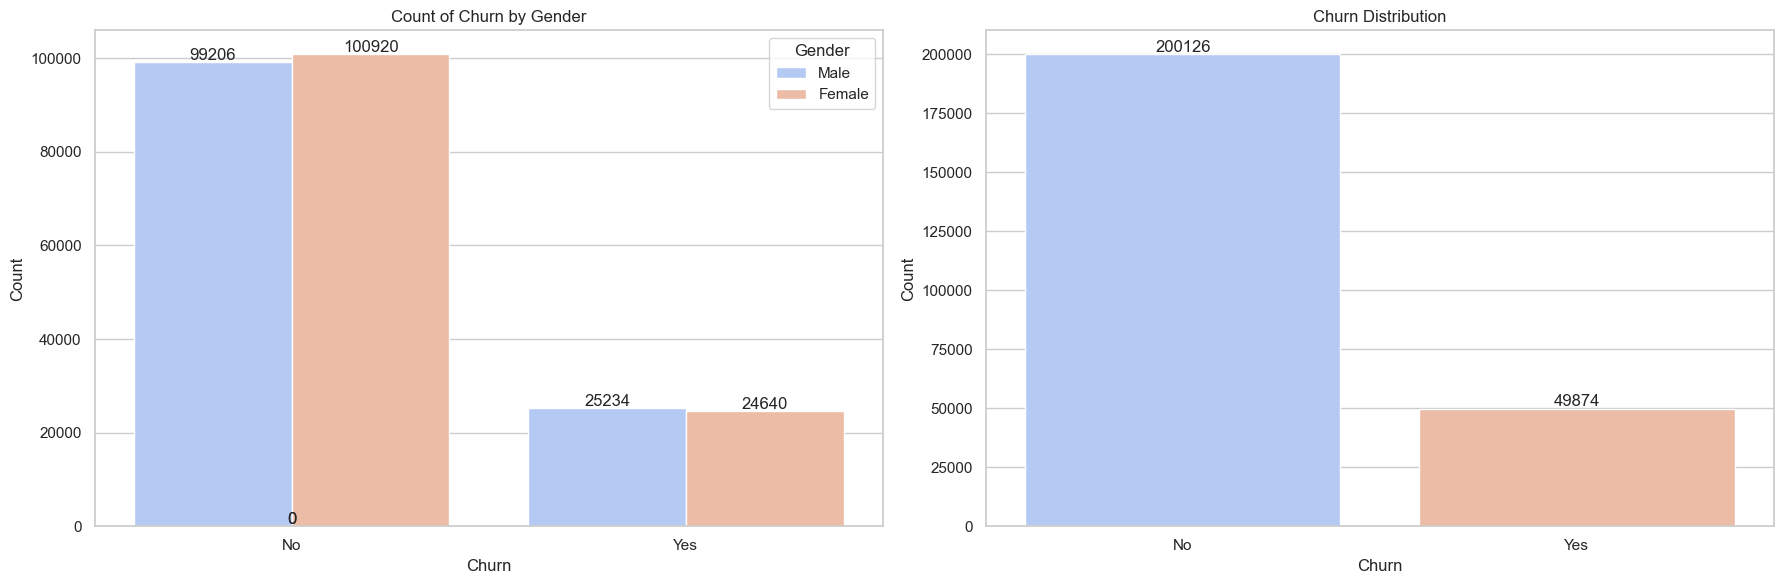

In [36]:

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Count Plot for Churn by Gender
ax = axes[0]
sns.countplot(x='Churn', hue='Gender', data=df, palette='coolwarm', ax=ax)
ax.set_title('Count of Churn by Gender')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])
ax.legend(title='Gender')

# Annotate each bar with the count number
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Count Plot for Churn Distribution
ax = axes[1]
sns.countplot(x='Churn', data=df, palette='coolwarm', ax=ax)
ax.set_title('Churn Distribution')
ax.set_xlabel('Churn')
ax.set_ylabel('Count')
ax.set_xticks([0, 1])
ax.set_xticklabels(['No', 'Yes'])

# Annotate each bar with the count number
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Adjust layout
plt.tight_layout()

# Display the plots
plt.show()

Overall Churn Rate: The overall churn rate is relatively low, with more customers not churning than churning.
Gender Differences: There is a slight difference in churn rates between male and female customers. Male customers have a slightly higher churn rate than female customers.   
Churn Counts: The total number of customers who churned is lower than the number of customers who did not churn.

## Number of Purchase by Product Category and Gender

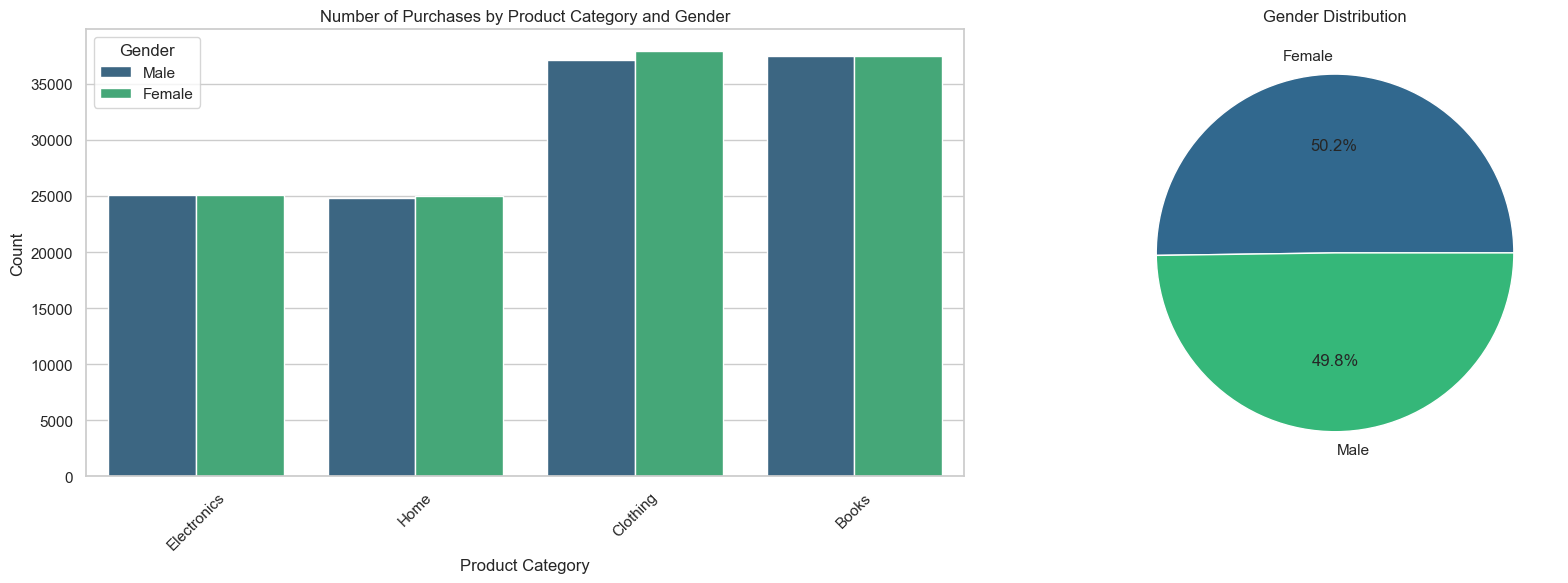

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Count Plot for Product Category by Gender
sns.countplot(x='Product Category', hue='Gender', data=data, palette='viridis', ax=axes[0])
axes[0].set_title('Number of Purchases by Product Category and Gender')
axes[0].set_xlabel('Product Category')
axes[0].set_ylabel('Count')
axes[0].legend(title='Gender')
axes[0].tick_params(axis='x', rotation=45)

# Pie Chart for Gender Distribution
gender_counts = data['Gender'].value_counts()
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(gender_counts)))
axes[1].set_title('Gender Distribution')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



Product Category Preferences: The most popular product category is Clothing, followed by Electronics, Home, and Books.
Gender Differences: There are some differences in purchasing behavior between male and female customers:
Male customers tend to purchase more Electronics and Clothing.
Female customers tend to purchase more Home and Books.
Gender Distribution: The gender distribution is fairly balanced, with slightly more female customers than male customers.

## Total Sales by Year

In [39]:
import pandas as pd
import plotly.graph_objects as go


df = pd.DataFrame(data)

# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d-%m-%Y')

# Extract year from 'Purchase Date'
df['Year'] = df['Purchase Date'].dt.year

# Aggregate total purchase amount by year
yearly_sales = df.groupby('Year')['Total Purchase Amount'].sum().reset_index()

# Create Plotly line graph
fig = go.Figure()

# Add line trace
fig.add_trace(go.Scatter(x=yearly_sales['Year'], 
                         y=yearly_sales['Total Purchase Amount'], 
                         mode='lines+markers', 
                         name='Total Sales', 
                         line=dict(color='blue'), 
                         marker=dict(size=8)))

# Annotate the highest sales point
max_sales = yearly_sales['Total Purchase Amount'].max()
max_sales_year = yearly_sales.loc[yearly_sales['Total Purchase Amount'] == max_sales, 'Year'].values[0]
fig.add_annotation(x=max_sales_year, 
                   y=max_sales, 
                   text=f'Highest Sales: {max_sales}', 
                   arrowhead=2, 
                   showarrow=True, 
                   ax=0, 
                   ay=-40, 
                   font=dict(color='red'))

# Update layout
fig.update_layout(
    title='Total Sales by Year',
    xaxis_title='Year',
    yaxis_title='Total Purchase Amount',
    xaxis=dict(tickmode='linear'),  # Ensure all years are displayed on x-axis
    yaxis=dict(zeroline=False),
    template='plotly_white'
)

# Show the plot
fig.show()













The plot shows the total sales by year. The x-axis represents the years (2020, 2021, 2022, and 2023), and the y-axis represents the total purchase amount for each year.

The line graph shows that the total sales increased from 2020 to 2021, then remained relatively stable in 2022, and finally dropped significantly in 2023. The highest sales occurred in 2021, with a total purchase amount of 185,276,174.

## Total Purchase Amount Over Time

In [40]:

df = pd.DataFrame(data)

# Convert 'Purchase Date' to datetime
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%m-%d-%Y')

# Set 'Purchase Date' as the index and resample monthly
monthly_totals = df.set_index('Purchase Date').resample('M')['Total Purchase Amount'].sum().reset_index()

# Find the months with the highest and lowest sales
max_sales = monthly_totals.loc[monthly_totals['Total Purchase Amount'].idxmax()]
min_sales = monthly_totals.loc[monthly_totals['Total Purchase Amount'].idxmin()]

# Plotly line plot
fig = px.line(monthly_totals, x='Purchase Date', y='Total Purchase Amount', title='Total Purchase Amount Over Time')

# Annotate the highest and lowest sales points
fig.add_scatter(x=[max_sales['Purchase Date']], y=[max_sales['Total Purchase Amount']], 
                mode='markers+text', text=['Highest Sales'], textposition='top right', 
                marker=dict(color='red', size=10), name='Highest Sales')

fig.add_scatter(x=[min_sales['Purchase Date']], y=[min_sales['Total Purchase Amount']], 
                mode='markers+text', text=['Lowest Sales'], textposition='bottom right', 
                marker=dict(color='blue', size=10), name='Lowest Sales')

# Update layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Purchase Amount',
    legend_title='Sales Points',
)

# Show plot
fig.show()


The line graph shows fluctuations in total purchase amount over time. The highest sales occurred in January 2021, while the lowest sales occurred in July 2023. Overall, the total purchase amount generally remained stable until the end of 2022, when it began to decline significantly.



### Conclusion

This exploratory data analysis provides valuable insights into customer behavior, payment preferences, product category trends, and sales performance over time.

**1. Payment Preferences:**
- **Credit Cards** are the most popular payment method, utilized in 40.2% of transactions, followed by **PayPal** at 29.9%. 
- **Cash** and **Cryptocurrencies** are less favored, with 20.0% and 9.9% of transactions respectively.
- Gender differences in payment methods are minor, with females slightly favoring PayPal and males using cash and cryptocurrencies slightly more.

**2. Product Category Distribution:**
- **Clothing** and **Books** are the most popular product categories, each constituting 30% of transactions.
- **Electronics** and **Home Goods** follow with 20.1% and 19.9% respectively.

**3. Age Group Spending Patterns:**
- **Sales** increase steadily with age, peaking in the **50+** age group, indicating higher spending among older customers.

**4. Churn Analysis:**
- The overall **churn rate** is relatively low, with 80.1% of customers not churning. However, male customers exhibit a slightly higher churn rate (50.8%) compared to female customers (49.2%).
- Despite the churn, more customers do not churn than churn.

**5. Gender-Based Purchasing Behavior:**
- **Male customers** are more inclined towards purchasing **Electronics** and **Clothing**, whereas **Female customers** prefer **Home Goods** and **Books**.

**6. Sales Trends:**
- **Total sales** increased from 2020 to 2021, peaking in 2021 at $185,276,174. 
- Sales remained stable through 2022 but experienced a significant drop in 2023, with the highest sales occurring in January 2021 and the lowest in July 2023.

In summary, the analysis highlights that credit cards and PayPal dominate as payment methods, older age groups contribute significantly to higher sales, and gender differences influence product preferences. The sales performance showed notable peaks and troughs, indicating potential areas for further investigation into factors driving these trends. The overall churn rate is low, though attention to the slightly higher churn rate among males could be beneficial for customer retention strategies.



# THANK YOU